In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [5]:
train_set = pd.read_csv('/content/train.csv')
train_set.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [6]:
print('The loan prediction dataset has')
print('\t  number of factors: ', train_set.shape[1])
print('\t  number of samples: ', train_set.shape[0])

The loan prediction dataset has
	  number of factors:  13
	  number of samples:  614


In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train_set.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
print('The factors in the dataset are')
i = 1
for j in train_set.columns:
  print(i,')',j)
  i += 1

The factors in the dataset are
1 ) Loan_ID
2 ) Gender
3 ) Married
4 ) Dependents
5 ) Education
6 ) Self_Employed
7 ) ApplicantIncome
8 ) CoapplicantIncome
9 ) LoanAmount
10 ) Loan_Amount_Term
11 ) Credit_History
12 ) Property_Area
13 ) Loan_Status


In [10]:
train_set.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
gender_column_null_value = train_set[train_set['Gender'].isnull()]
gender_column_null_value

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [12]:
train_set['Gender'].fillna(train_set['Gender'].mode()[0],inplace=True)

In [13]:
married_column_null_value = train_set[train_set['Married'].isnull()]
married_column_null_value

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [14]:
train_set['Married'].fillna(train_set['Married'].mode()[0],inplace=True)

In [15]:
dependents_column_null_value = train_set[train_set['Dependents'].isnull()]
dependents_column_null_value

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [16]:
train_set['Dependents'].fillna(train_set['Dependents'].mode()[0],inplace=True)

In [17]:
Self_Employed_column_null_value = train_set[train_set['Self_Employed'].isnull()]
Self_Employed_column_null_value

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [18]:
train_set['Self_Employed'].fillna(train_set['Self_Employed'].mode()[0],inplace=True)

In [19]:
LoanAmount_column_null_value = train_set[train_set['LoanAmount'].isnull()]
LoanAmount_column_null_value

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [20]:
train_set['LoanAmount'].fillna(train_set['LoanAmount'].mean(),inplace=True)

In [21]:
Loan_Amount_Term_column_null_value = train_set[train_set['Loan_Amount_Term'].isnull()]
Loan_Amount_Term_column_null_value

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [22]:
train_set['Loan_Amount_Term'].fillna(train_set['Loan_Amount_Term'].mean(),inplace=True)

In [23]:
Credit_History_column_null_value = train_set[train_set['Credit_History'].isnull()]
Credit_History_column_null_value

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.000000,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,No,3717,2925.0,151.000000,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,No,4166,3369.0,201.000000,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.000000,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.000000,360.0,NaN,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.000000,360.0,NaN,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.000000,360.0,NaN,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,146.412162,360.0,NaN,Urban,N
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.000000,360.0,NaN,Urban,Y
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.000000,360.0,NaN,Rural,Y


In [24]:
train_set['Credit_History'].fillna(train_set['Credit_History'].mode()[0],inplace=True)

In [25]:
train_set.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
train_set['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [27]:
train_set = train_set.replace(to_replace='3+',value = 3)

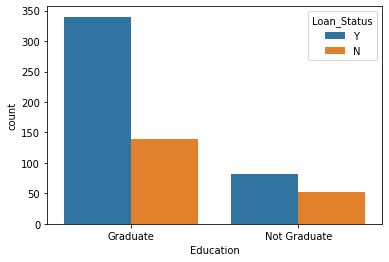

In [28]:
sns.countplot(x='Education',hue='Loan_Status',data=train_set)

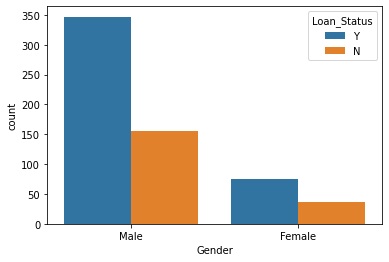

In [29]:
sns.countplot(x='Gender',hue='Loan_Status',data=train_set)

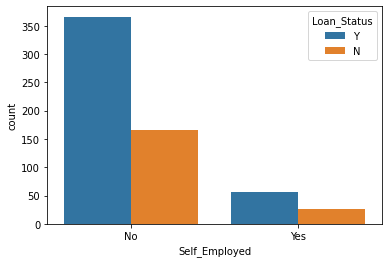

In [30]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=train_set)

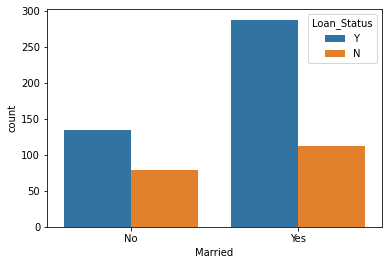

In [31]:
sns.countplot(x='Married',hue='Loan_Status',data=train_set)

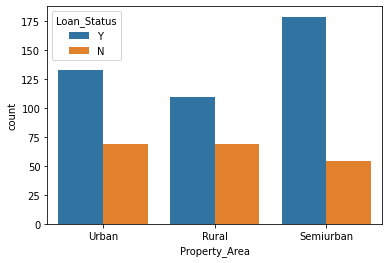

In [32]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=train_set)

In [33]:
train_set['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [34]:
train_set.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [35]:
train_set.replace({'Gender':{'Male':1,'Female':0}},inplace=True)

In [36]:
train_set.replace({'Married':{'Yes':0,'No':1}},inplace=True)

In [37]:
train_set.replace({'Education':{'Not Graduate':0,'Graduate':1}},inplace=True)

In [38]:
train_set.replace({'Self_Employed':{'No':0,'Yes':1}},inplace=True)

In [39]:
train_set.replace({'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)

In [40]:
train_set.drop('Loan_ID',axis = 1,inplace=True)

In [41]:
train_set.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,0,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,0,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,0,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,1,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [42]:
train_corr = train_set.corr()
train_corr

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.364569,-0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.025752,0.017987
Married,-0.364569,1.000000,0.012304,-0.004489,-0.051708,-0.075948,-0.147141,0.100863,-0.010938,-0.004257,-0.091478
Education,-0.045364,0.012304,1.000000,0.010383,0.140760,0.062290,0.166998,0.077242,0.073658,0.065243,0.085884
Self_Employed,-0.000525,-0.004489,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,-0.051708,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,-0.075948,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.107930,-0.147141,0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,0.100863,0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974
Credit_History,0.009170,-0.010938,0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.001963,0.540556
Property_Area,-0.025752,-0.004257,0.065243,-0.030860,-0.009500,0.010522,-0.044776,-0.077620,0.001963,1.000000,0.032112


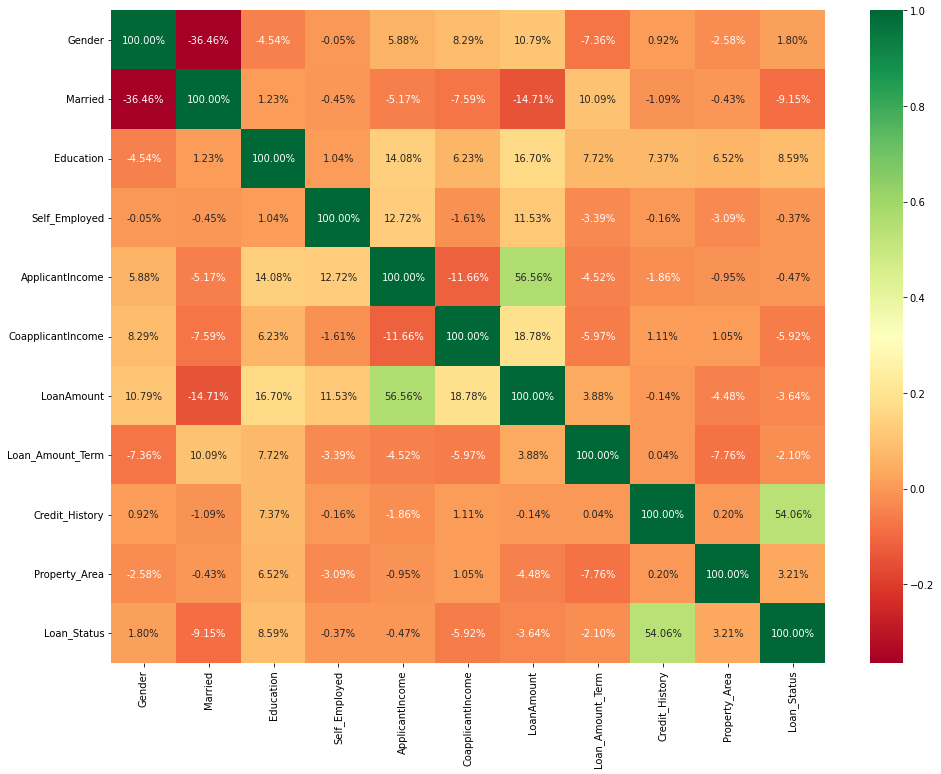

In [43]:
plt.figure(figsize = (16, 12))
sns.heatmap(train_corr, cmap = 'RdYlGn', annot = True, fmt = '.2%')

In [44]:
corr_with_loan_status = train_set.corrwith(train_set['Loan_Status'])
corr_with_loan_status

Gender               0.017987
Married             -0.091478
Education            0.085884
Self_Employed       -0.003700
ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.020974
Credit_History       0.540556
Property_Area        0.032112
Loan_Status          1.000000
dtype: float64

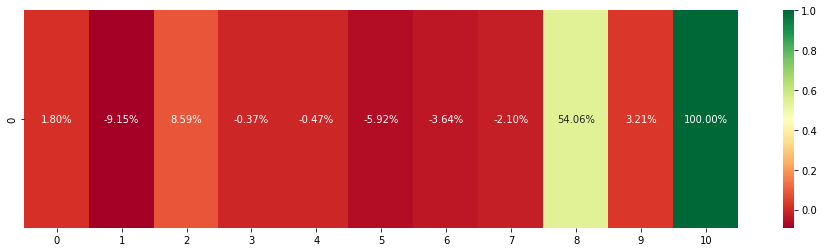

In [45]:
plt.figure(figsize = (16, 4))
sns.heatmap([corr_with_loan_status], cmap = 'RdYlGn', annot = True, fmt = '.2%')

In [46]:
X = train_set.drop(columns=['Loan_Status'],axis=1)
Y = train_set['Loan_Status']

In [47]:
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [48]:
print(model.feature_importances_)

[0.02030966 0.02162043 0.0607899  0.02055694 0.02165735 0.18360758
 0.11560194 0.18021554 0.0491213  0.2798795  0.04663985]


In [49]:
print("Percentage Importance of each features with respect to Loan_Status : ")
pd.Series(model.feature_importances_*100, index = train_set.columns[:-1])

Percentage Importance of each features with respect to Loan_Status : 


Gender                2.030966
Married               2.162043
Dependents            6.078990
Education             2.055694
Self_Employed         2.165735
ApplicantIncome      18.360758
CoapplicantIncome    11.560194
LoanAmount           18.021554
Loan_Amount_Term      4.912130
Credit_History       27.987950
Property_Area         4.663985
dtype: float64

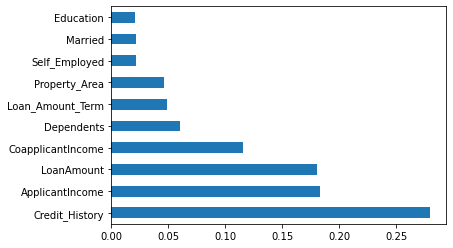

In [50]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

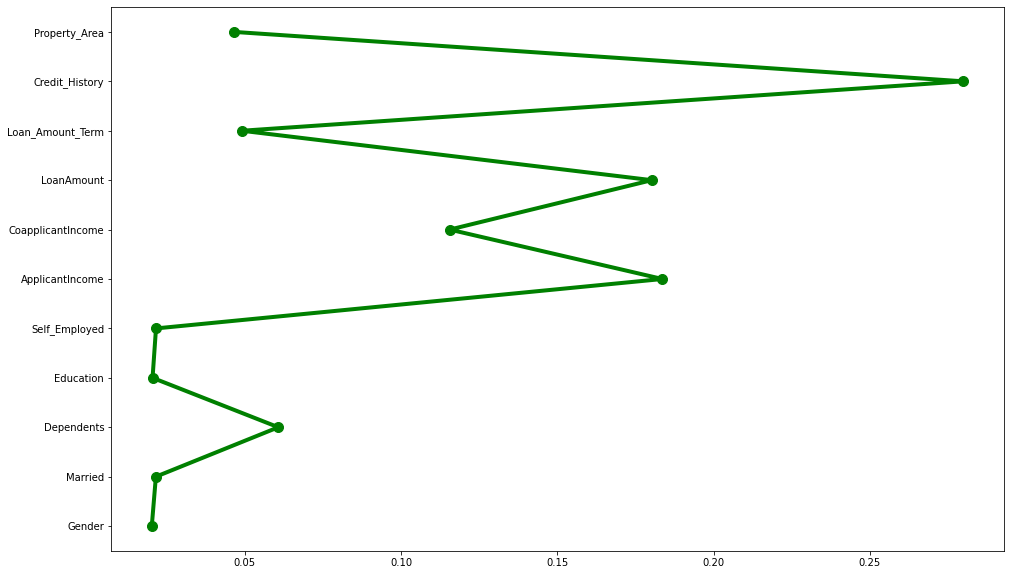

In [51]:
plt.figure(figsize=(16, 10))
plt.plot(model.feature_importances_, train_set.columns[:-1], 'g-o', linewidth=4, markersize=10)

In [52]:
prediction_features = pd.Series(model.feature_importances_*100, index = train_set.columns[:-1]).sort_values(ascending = False)

In [53]:
prediction_features = prediction_features.index

In [54]:
prediction_features = prediction_features[:5]
prediction_features

Index(['Credit_History', 'ApplicantIncome', 'LoanAmount', 'CoapplicantIncome',
       'Dependents'],
      dtype='object')

In [55]:
print('The features that are important to loan status are')
i = 1
for j in prediction_features:
  print(i,')',j)
  i += 1

The features that are important to loan status are
1 ) Credit_History
2 ) ApplicantIncome
3 ) LoanAmount
4 ) CoapplicantIncome
5 ) Dependents


In [56]:
feature_columns = train_set[prediction_features]
prediction_column = train_set['Loan_Status']

In [57]:
X = feature_columns.values
y = prediction_column.values

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 3)

In [59]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((460, 5), (154, 5), (460,), (154,))

In [60]:
logistic_model = LogisticRegression(max_iter = 200)

In [61]:
logistic_model.fit(X_train, y_train)

print("Training Accuracy : {}%".format(logistic_model.score(X_train, y_train) * 100))
print("Testing Accuracy  : {}%".format(logistic_model.score(X_test, y_test) * 100))

Training Accuracy : 80.0%
Testing Accuracy  : 85.06493506493507%


In [62]:
decision_tree_model = DecisionTreeClassifier(max_depth = 5) #randomly selecting the max_depth as 5
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [64]:
test_set  = pd.read_csv('/content/test.csv')
test_set.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban


In [65]:
test_set = test_set.loc[:, prediction_features]
test_set.head(7)

,Credit_History,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents
0,1.0,5720,110.0,0,0
1,1.0,3076,126.0,1500,1
2,1.0,5000,208.0,1800,2
3,NaN,2340,100.0,2546,2
4,1.0,3276,78.0,0,0
5,1.0,2165,152.0,3422,0
6,1.0,2226,59.0,0,1


In [66]:
test_set.isnull().sum()

Credit_History       29
ApplicantIncome       0
LoanAmount            5
CoapplicantIncome     0
Dependents           10
dtype: int64

In [67]:
test_set = test_set.dropna(how = 'any')

In [68]:
test_set['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [69]:
test_set.replace({'Dependents':{'3+':3}},inplace=True)

In [70]:
test_set['Loan_Status_Predicted'] = decision_tree_model.predict(test_set.values)

In [71]:
test_set.head(20)

,Credit_History,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Loan_Status_Predicted
0,1.0,5720,110.0,0,0,1
1,1.0,3076,126.0,1500,1,1
2,1.0,5000,208.0,1800,2,1
4,1.0,3276,78.0,0,0,1
5,1.0,2165,152.0,3422,0,1
6,1.0,2226,59.0,0,1,1
7,0.0,3881,147.0,0,2,0
8,1.0,13633,280.0,0,2,1
9,1.0,2400,123.0,2400,0,1
10,1.0,3091,90.0,0,0,1


In [72]:
test_set.Loan_Status_Predicted.value_counts()

1    265
0     61
Name: Loan_Status_Predicted, dtype: int64